<a href="https://colab.research.google.com/github/hirokimituya/book_stock-price-analysis/blob/main/ch7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.core.display import update_display
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2023-02-28 21:17:47--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-02-28 21:17:47--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-02-28 21:17:47--  http://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving gigenet.dl.sour

In [2]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader(f'{code}.JP', 'stooq').sort_index()
  return df

In [3]:
"""棒グラフの例"""
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'colab'

x = [1, 2, 3, 4, 5]
y = [10, 20, 30, 40, 50]
data = go.Bar(x=x, y=y)
fig = go.Figure(data)
fig.show()

In [4]:
"""ローソク足チャートの表示"""
import plotly.graph_objs as go
import datetime as dt
import pandas as pd

name = '積水ハウス'
code = 1928
df = get_stock_data(code)

rdf = df[dt.datetime(2021, 12, 1):dt.datetime(2022, 3, 31)]

# インデックスを文字列型に
rdf.index = pd.to_datetime(rdf.index).strftime('%m-%d-%Y')

# レイアウト定義
layout = {
    'title': {'text': f'{code}, {name}', 'x': 0.5},
    'xaxis': {'title': '日付', 'rangeslider': {'visible': False}},
    'yaxis': {'title': '価格（円）', 'side': 'left', 'tickformat': ','},
    'plot_bgcolor': 'light blue'
}

# データ定義
data = [
    go.Candlestick(
        x=rdf.index,
        open=rdf['Open'],
        high=rdf['High'],
        low=rdf['Low'],
        close=rdf['Close'],
        increasing_line_color='red',
        increasing_line_width=1.0,
        increasing_fillcolor='red',
        decreasing_line_color='gray',
        decreasing_line_width=1.0,
        decreasing_fillcolor='gray'
    )
]

#　グラフ生成
fig = go.Figure(data=data, layout=go.Layout(layout))

# レイアウトを更新
fig.update_layout({
    'xaxis': {
        # 日付を半分に
        'tickvals': rdf.index[::2],
        # 表示形式を MM-DD　に
        'ticktext': ['{}-{}'.format(x.split("-")[0], x.split("-")[1]) for x in rdf.index[::2]]
    }
})

# 表示
fig.show()

In [5]:
"""移動平均線の表示"""
import plotly.graph_objs as go
import datetime as dt
import pandas as pd
import talib as ta

name = '積水ハウス'
code = 1928
df = get_stock_data(code)

# 5日移動平均
df['ma5'] = ta.SMA(df['Close'], timeperiod=5)
# 25日移動平均
df['ma25'] = ta.SMA(df['Close'], timeperiod=25)

rdf = df[dt.datetime(2021, 12, 1):dt.datetime(2022, 3, 31)]

# インデックスを文字列型に
rdf.index = pd.to_datetime(rdf.index).strftime('%m-%d-%Y')

# レイアウト定義
layout = {
    'title': {'text': f'{code}, {name}', 'x': 0.5},
    'xaxis': {'title': '日付', 'rangeslider': {'visible': False}},
    'yaxis': {'title': '価格（円）', 'side': 'left', 'tickformat': ','},
    'plot_bgcolor': 'light blue'
}

# データ定義
data = [
    # ローソク足
    go.Candlestick(x=rdf.index, open=rdf['Open'], high=rdf['High'], low=rdf['Low'],
                   close=rdf['Close'], increasing_line_color='red',
                   decreasing_line_color='gray'),
    # 5日移動平均線
    go.Scatter(x=rdf.index, y=rdf['ma5'], name='MA5',
               line={'color': 'royalblue', 'width': 1.2}),
    # 25日移動平均線
    go.Scatter(x=rdf.index, y=rdf['ma25'], name='MA25',
               line={'color': 'lightseagreen', 'width': 1.2})
]

#　グラフ生成
fig = go.Figure(data=data, layout=go.Layout(layout))

# レイアウトを更新
fig.update_layout({
    'xaxis': {
        # 日付を半分に
        'tickvals': rdf.index[::2],
        # 表示形式を YYYY-MM-DD　に
        'ticktext': [f'{x.split("-")[2]}-{x.split("-")[0]}-{x.split("-")[1]}' for x in rdf.index[::2]]
    }
})

# 表示
fig.show()

In [6]:
"""マーカーの一覧表示"""
import plotly.graph_objects as go
from plotly.validators.scatter.marker import SymbolValidator

raw_symbols = SymbolValidator().values
namestems = []
namevariants = []
symbols = []

for i in range(0, len(raw_symbols), 3):
    name = raw_symbols[i + 2]
    symbols.append(raw_symbols[i])
    namestems.append(name.replace('-open', '').replace('-dot', ''))
    namevariants.append(name[len(namestems[-1]):])

fig = go.Figure(go.Scatter(mode='markers', x=namevariants, y=namestems,
                           marker_symbol=symbols,
                           marker_line_color='midnightblue', marker_color='lightskyblue',
                           marker_line_width=2, marker_size=15,
                           hovertemplate='name: %{y}%{x}<br>number: ' \
                           '%{marker.symbol}<extra></extra>'))

fig.update_layout(title='Mouse over symbols for name & number!',
                  xaxis_range=[-1, 4], yaxis_range=[len(set(namestems)), -1],
                  margin=dict(b=0, r=0), xaxis_side='top', height=1400, width=400)

fig.show()

In [7]:
"""ゴールデンクロスとデッドクロスの表示"""
import plotly.graph_objs as go
import datetime as dt
import numpy as np
import talib as ta

name = '積水ハウス'
code = 1928
df = get_stock_data(code)
close = df['Close']

# 5日, 25日移動平均を算出
ma5 = ta.SMA(close, timeperiod=5)
ma25 = ta.SMA(close, timeperiod=25)

df['ma5'], df['ma25'] = ma5, ma25
cross = ma5 > ma25

cross_shift = cross.shift(1)
temp_gc = (cross != cross_shift) & (cross == True)
temp_dc = (cross != cross_shift) & (cross == False)

# ゴールデンクロス発生日であればMA5の値、それ以外はNaN
gc = [m if g == True else np.nan for g, m in zip(temp_gc, ma5)]

# デッドクロス発生日であればMA25の値、それ以外はNaN
dc = [m if d == True else np.nan for d, m in zip(temp_dc, ma25)]

# データフレームのカラムとして保存
df['gc'], df['dc'] = gc, dc

rdf = df[dt.datetime(2021, 12, 1):dt.datetime(2022, 3, 31)]

# インデックスを文字列型に
rdf.index = pd.to_datetime(rdf.index).strftime('%m-%d-%Y')

# レイアウト定義
layout = {
    'title': {'text': f'{code}, {name}', 'x': 0.5},
    'xaxis': {'title': '日付', 'rangeslider': {'visible': False}},
    'yaxis': {'title': '価格（円）', 'side': 'left', 'tickformat': ','},
    'plot_bgcolor': 'light blue'
}

# データ定義
data = [
    # ローソク足
    go.Candlestick(x=rdf.index, open=rdf['Open'], high=rdf['High'], low=rdf['Low'],
                   close=rdf['Close'], increasing_line_color='red',
                   decreasing_line_color='gray'),
    # 5日移動平均線
    go.Scatter(x=rdf.index, y=rdf['ma5'], name='MA5',
               line={'color': 'royalblue', 'width': 1.2}),
    # 25日移動平均線
    go.Scatter(x=rdf.index, y=rdf['ma25'], name='MA25',
               line={'color': 'lightseagreen', 'width': 1.2}),
    # ゴールデンクロス
    go.Scatter(x=rdf.index, y=rdf['gc'], name='Golden Cross', opacity=0.5, mode='markers',
               marker={'size': 15, 'color': 'purple'}),
    # デッドクロス
    go.Scatter(x=rdf.index, y=rdf['dc'], name='Dead Cross', mode='markers', opacity=0.8,
               marker={'size': 15, 'color': 'black', 'symbol': 'x'})
]

#　グラフ生成
fig = go.Figure(data=data, layout=go.Layout(layout))

# レイアウトを更新
fig.update_layout({
    'xaxis': {
        # 日付を半分に
        'tickvals': rdf.index[::2],
        # 表示形式を YYYY-MM-DD　に
        'ticktext': [f'{x.split("-")[2]}-{x.split("-")[0]}-{x.split("-")[1]}' for x in rdf.index[::2]]
    }
})

# 表示
fig.show()

In [8]:
"""ボリンジャーバンドの表示"""
import plotly.graph_objs as go
import datetime as dt
import numpy as np
import talib as ta

name = '積水ハウス'
code = 1928
df = get_stock_data(code)
close = df['Close']

# 5日, 25日移動平均を算出
ma5 = ta.SMA(close, timeperiod=5)
ma25 = ta.SMA(close, timeperiod=25)

df['ma5'], df['ma25'] = ma5, ma25
cross = ma5 > ma25

cross_shift = cross.shift(1)
temp_gc = (cross != cross_shift) & (cross == True)
temp_dc = (cross != cross_shift) & (cross == False)

# ゴールデンクロス発生日であればMA5の値、それ以外はNaN
gc = [m if g == True else np.nan for g, m in zip(temp_gc, ma5)]

# デッドクロス発生日であればMA25の値、それ以外はNaN
dc = [m if d == True else np.nan for d, m in zip(temp_dc, ma25)]

# データフレームのカラムとして保存
df['gc'], df['dc'] = gc, dc

# ボリンジャーバンドの算出
upper2, _, lower2 = ta.BBANDS(close, timeperiod=25, nbdevup=2, nbdevdn=2, matype=0)
df['upper2'], df['lower2'] = upper2, lower2

rdf = df[dt.datetime(2021, 12, 1):dt.datetime(2022, 3, 31)]

# インデックスを文字列型に
rdf.index = pd.to_datetime(rdf.index).strftime('%m-%d-%Y')

# レイアウト定義
layout = {
    'title': {'text': f'{code}, {name}', 'x': 0.5},
    'xaxis': {'title': '日付', 'rangeslider': {'visible': False}},
    'yaxis': {'title': '価格（円）', 'side': 'left', 'tickformat': ','},
    'plot_bgcolor': 'light blue'
}

# データ定義
data = [
    # ローソク足
    go.Candlestick(x=rdf.index, open=rdf['Open'], high=rdf['High'], low=rdf['Low'],
                   close=rdf['Close'], increasing_line_color='red',
                   decreasing_line_color='gray'),
    # 5日移動平均線
    go.Scatter(x=rdf.index, y=rdf['ma5'], name='MA5',
               line={'color': 'royalblue', 'width': 1.2}),
    # 25日移動平均線
    go.Scatter(x=rdf.index, y=rdf['ma25'], name='MA25',
               line={'color': 'lightseagreen', 'width': 1.2}),
    # ゴールデンクロス
    go.Scatter(x=rdf.index, y=rdf['gc'], name='Golden Cross', opacity=0.5, mode='markers',
               marker={'size': 15, 'color': 'purple'}),
    # デッドクロス
    go.Scatter(x=rdf.index, y=rdf['dc'], name='Dead Cross', mode='markers', opacity=0.8,
               marker={'size': 15, 'color': 'black', 'symbol': 'x'}),
    # ボリンジャーバンド
    go.Scatter(x=rdf.index, y=rdf['upper2'], name='',
               line={'color': 'lavender', 'width': 0}),
    go.Scatter(x=rdf.index, y=rdf['lower2'], name='BB',
               line={'color': 'lavender', 'width': 0},
               fill='tonexty', fillcolor='rgba(170, 170, 170, .2)')
]

#　グラフ生成
fig = go.Figure(data=data, layout=go.Layout(layout))

# レイアウトを更新
fig.update_layout({
    'xaxis': {
        # 日付を半分に
        'tickvals': rdf.index[::2],
        # 表示形式を YYYY-MM-DD　に
        'ticktext': [f'{x.split("-")[2]}-{x.split("-")[0]}-{x.split("-")[1]}' for x in rdf.index[::2]]
    }
})

# 表示
fig.show()

In [10]:
"""出来高の表示"""
import plotly.graph_objs as go
import datetime as dt
import numpy as np
import talib as ta

name = '積水ハウス'
code = 1928
df = get_stock_data(code)
close = df['Close']

# 5日, 25日移動平均を算出
ma5 = ta.SMA(close, timeperiod=5)
ma25 = ta.SMA(close, timeperiod=25)

df['ma5'], df['ma25'] = ma5, ma25
cross = ma5 > ma25

cross_shift = cross.shift(1)
temp_gc = (cross != cross_shift) & (cross == True)
temp_dc = (cross != cross_shift) & (cross == False)

# ゴールデンクロス発生日であればMA5の値、それ以外はNaN
gc = [m if g == True else np.nan for g, m in zip(temp_gc, ma5)]

# デッドクロス発生日であればMA25の値、それ以外はNaN
dc = [m if d == True else np.nan for d, m in zip(temp_dc, ma25)]

# データフレームのカラムとして保存
df['gc'], df['dc'] = gc, dc

# ボリンジャーバンドの算出
upper2, _, lower2 = ta.BBANDS(close, timeperiod=25, nbdevup=2, nbdevdn=2, matype=0)
df['upper2'], df['lower2'] = upper2, lower2

rdf = df[dt.datetime(2021, 12, 1):dt.datetime(2022, 3, 31)]

# インデックスを文字列型に
rdf.index = pd.to_datetime(rdf.index).strftime('%m-%d-%Y')

# レイアウト定義
layout = {
    'height': 800,
    'title': {'text': f'{code}, {name}', 'x': 0.5},
    'xaxis': {'title': '日付', 'rangeslider': {'visible': False}},
    'yaxis1': {'domain': [.20, 1.0], 'title': '価格（円）', 'side': 'left', 'tickformat': ','},
    'yaxis2': {'domain': [.10, .20]},
    'yaxis3': {'domain': [.00, .10], 'title': 'Volume', 'side': 'right'},
    'plot_bgcolor': 'light blue'
}

# データ定義
data = [
    # ローソク足
    go.Candlestick(yaxis='y1', x=rdf.index, open=rdf['Open'], high=rdf['High'], low=rdf['Low'],
                   close=rdf['Close'], increasing_line_color='red',
                   decreasing_line_color='gray'),
    # 5日移動平均線
    go.Scatter(yaxis='y1', x=rdf.index, y=rdf['ma5'], name='MA5',
               line={'color': 'royalblue', 'width': 1.2}),
    # 25日移動平均線
    go.Scatter(yaxis='y1', x=rdf.index, y=rdf['ma25'], name='MA25',
               line={'color': 'lightseagreen', 'width': 1.2}),
    # ゴールデンクロス
    go.Scatter(yaxis='y1', x=rdf.index, y=rdf['gc'], name='Golden Cross', opacity=0.5, mode='markers',
               marker={'size': 15, 'color': 'purple'}),
    # デッドクロス
    go.Scatter(yaxis='y1', x=rdf.index, y=rdf['dc'], name='Dead Cross', mode='markers', opacity=0.8,
               marker={'size': 15, 'color': 'black', 'symbol': 'x'}),
    # ボリンジャーバンド
    go.Scatter(yaxis='y1', x=rdf.index, y=rdf['upper2'], name='',
               line={'color': 'lavender', 'width': 0}),
    go.Scatter(x=rdf.index, y=rdf['lower2'], name='BB',
               line={'color': 'lavender', 'width': 0},
               fill='tonexty', fillcolor='rgba(170, 170, 170, .2)'),
    # 出来高
    go.Bar(yaxis='y3', x=rdf.index, y=rdf['Volume'], name='Volume',
           marker={'color': 'slategray'})
]

#　グラフ生成
fig = go.Figure(data=data, layout=go.Layout(layout))

# レイアウトを更新
fig.update_layout({
    'xaxis': {
        # 日付を半分に
        'tickvals': rdf.index[::2],
        # 表示形式を YYYY-MM-DD　に
        'ticktext': [f'{x.split("-")[2]}-{x.split("-")[0]}-{x.split("-")[1]}' for x in rdf.index[::2]]
    }
})

# 表示
fig.show()

In [17]:
"""MACD、RSI、ストキャスティクスの表示"""
import plotly.graph_objs as go
import datetime as dt
import numpy as np
import talib as ta

name = '積水ハウス'
code = 1928
df = get_stock_data(code)
close = df['Close']

# 5日, 25日移動平均を算出
ma5 = ta.SMA(close, timeperiod=5)
ma25 = ta.SMA(close, timeperiod=25)

df['ma5'], df['ma25'] = ma5, ma25
cross = ma5 > ma25

cross_shift = cross.shift(1)
temp_gc = (cross != cross_shift) & (cross == True)
temp_dc = (cross != cross_shift) & (cross == False)

# ゴールデンクロス発生日であればMA5の値、それ以外はNaN
gc = [m if g == True else np.nan for g, m in zip(temp_gc, ma5)]

# デッドクロス発生日であればMA25の値、それ以外はNaN
dc = [m if d == True else np.nan for d, m in zip(temp_dc, ma25)]

# データフレームのカラムとして保存
df['gc'], df['dc'] = gc, dc

# ボリンジャーバンドの算出
upper2, _, lower2 = ta.BBANDS(close, timeperiod=25, nbdevup=2, nbdevdn=2, matype=0)
df['upper2'], df['lower2'] = upper2, lower2

# MACD、シグナル、ヒストグラムを算出
macd, macdsignal, hist = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
df['macd'] = macd
df['macd_signal'] = macdsignal
df['hist'] = hist

# RSI
rsi14 = ta.RSI(close, timeperiod=14)
rsi28 = ta.RSI(close, timeperiod=28)
df['rsi14'], df['rsi28'] = rsi14, rsi28
# 補助線
df['70'], df['30'] = [70 for _ in close], [30 for _ in close]

# ストキャスティクス
slowK, slowD = ta.STOCH(df['High'], df['Low'], df['Close'],
                        fastk_period=5, slowk_period=3,
                        slowk_matype=0, slowd_period=3,
                        slowd_matype=0)
df['slowK'], df['slowD'] = slowK, slowD
# 補助線
df['80'], df['20'] = [80 for _ in close], [20 for _ in close]

rdf = df[dt.datetime(2021, 12, 1):dt.datetime(2022, 3, 31)]

# インデックスを文字列型に
rdf.index = pd.to_datetime(rdf.index).strftime('%m-%d-%Y')

# レイアウト定義
layout = {
    'height': 1000,
    'title': {'text': f'{code}, {name}', 'x': 0.5},
    'xaxis': {'rangeslider': {'visible': False}},
    'yaxis1': {'domain': [.46, 1.0], 'title': '価格（円）', 'side': 'left', 'tickformat': ','},
    'yaxis2': {'domain': [.40, .46]},
    # MACD
    'yaxis3': {'domain': [.30, .395], 'title': 'MACD', 'side': 'right'},
    # RSI
    'yaxis4': {'domain': [.20, .295], 'title': 'RSI', 'side': 'right'},
    # ストキャスティクス
    'yaxis5': {'domain': [.10, .195], 'title': 'STC', 'side': 'right'},
    # 出来高
    'yaxis6': {'domain': [.00, .095], 'title': 'Volume', 'side': 'right'},
    'plot_bgcolor': 'light blue'
}

# データ定義
data = [
    # ローソク足
    go.Candlestick(yaxis='y1', x=rdf.index, open=rdf['Open'], high=rdf['High'], low=rdf['Low'],
                   close=rdf['Close'], increasing_line_color='red',
                   decreasing_line_color='gray'),
    # 5日移動平均線
    go.Scatter(yaxis='y1', x=rdf.index, y=rdf['ma5'], name='MA5',
               line={'color': 'royalblue', 'width': 1.2}),
    # 25日移動平均線
    go.Scatter(yaxis='y1', x=rdf.index, y=rdf['ma25'], name='MA25',
               line={'color': 'lightseagreen', 'width': 1.2}),
    # ゴールデンクロス
    go.Scatter(yaxis='y1', x=rdf.index, y=rdf['gc'], name='Golden Cross', opacity=0.5, mode='markers',
               marker={'size': 15, 'color': 'purple'}),
    # デッドクロス
    go.Scatter(yaxis='y1', x=rdf.index, y=rdf['dc'], name='Dead Cross', mode='markers', opacity=0.8,
               marker={'size': 15, 'color': 'black', 'symbol': 'x'}),
    # ボリンジャーバンド
    go.Scatter(yaxis='y1', x=rdf.index, y=rdf['upper2'], name='',
               line={'color': 'lavender', 'width': 0}),
    go.Scatter(x=rdf.index, y=rdf['lower2'], name='BB',
               line={'color': 'lavender', 'width': 0},
               fill='tonexty', fillcolor='rgba(170, 170, 170, .2)'),
    
    # MACD
    go.Scatter(yaxis='y3', x=rdf.index, y=rdf['macd'], name='macd',
               line={'color': 'magenta', 'width': 1}),
    go.Scatter(yaxis='y3', x=rdf.index, y=rdf['macd_signal'], name='signal',
               line={'color': 'green', 'width': 1}),
    go.Bar(yaxis='y3', x=rdf.index, y=rdf['hist'], name='histgram',
           marker={'color': 'slategray'}),
    
    # RSI
    go.Scatter(yaxis='y4', x=rdf.index, y=rdf['rsi14'], name='RSI14',
               line={'color': 'magenta', 'width': 1}),
    go.Scatter(yaxis='y4', x=rdf.index, y=rdf['rsi28'], name='RSI18',
               line={'color': 'green', 'width': 1}),
    # 補助線
    go.Scatter(yaxis='y4', x=rdf.index, y=rdf['30'], name='30',
               line={'color': 'black', 'width': 0.5}),
    go.Scatter(yaxis='y4', x=rdf.index, y=rdf['70'], name='70',
               line={'color': 'black', 'width': 0.5}),
        
    # ストキャスティクス
    go.Scatter(yaxis='y5', x=rdf.index, y=rdf['slowK'], name='slowK',
               line={'color': 'magenta', 'width': 1}),
    go.Scatter(yaxis='y5', x=rdf.index, y=rdf['slowD'], name='slowD',
               line={'color': 'green', 'width': 1}),
    # 補助線
    go.Scatter(yaxis='y5', x=rdf.index, y=rdf['20'], name='20',
               line={'color': 'black', 'width': 0.5}),
    go.Scatter(yaxis='y5', x=rdf.index, y=rdf['80'], name='80',
               line={'color': 'black', 'width': 0.5}),

    # 出来高
    go.Bar(yaxis='y6', x=rdf.index, y=rdf['Volume'], name='Volume',
           marker={'color': 'slategray'})
]

#　グラフ生成
fig = go.Figure(data=data, layout=go.Layout(layout))

# レイアウトを更新
fig.update_layout({
    'xaxis': {
        # 日付を半分に
        'tickvals': rdf.index[::2],
        # 表示形式を YYYY-MM-DD　に
        'ticktext': [f'{x.split("-")[2]}-{x.split("-")[0]}-{x.split("-")[1]}' for x in rdf.index[::2]]
    }
})

# 表示
fig.show()

In [18]:
"""Googleドライブの参照"""
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/')

Mounted at /content/drive


In [19]:
"""ファイルの出力"""
import plotly.graph_objs as go
import datetime as dt
import numpy as np
import talib as ta

name = '積水ハウス'
code = 1928
df = get_stock_data(code)
close = df['Close']

# 5日, 25日移動平均を算出
ma5 = ta.SMA(close, timeperiod=5)
ma25 = ta.SMA(close, timeperiod=25)

df['ma5'], df['ma25'] = ma5, ma25
cross = ma5 > ma25

cross_shift = cross.shift(1)
temp_gc = (cross != cross_shift) & (cross == True)
temp_dc = (cross != cross_shift) & (cross == False)

# ゴールデンクロス発生日であればMA5の値、それ以外はNaN
gc = [m if g == True else np.nan for g, m in zip(temp_gc, ma5)]

# デッドクロス発生日であればMA25の値、それ以外はNaN
dc = [m if d == True else np.nan for d, m in zip(temp_dc, ma25)]

# データフレームのカラムとして保存
df['gc'], df['dc'] = gc, dc

# ボリンジャーバンドの算出
upper2, _, lower2 = ta.BBANDS(close, timeperiod=25, nbdevup=2, nbdevdn=2, matype=0)
df['upper2'], df['lower2'] = upper2, lower2

# MACD、シグナル、ヒストグラムを算出
macd, macdsignal, hist = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
df['macd'] = macd
df['macd_signal'] = macdsignal
df['hist'] = hist

# RSI
rsi14 = ta.RSI(close, timeperiod=14)
rsi28 = ta.RSI(close, timeperiod=28)
df['rsi14'], df['rsi28'] = rsi14, rsi28
# 補助線
df['70'], df['30'] = [70 for _ in close], [30 for _ in close]

# ストキャスティクス
slowK, slowD = ta.STOCH(df['High'], df['Low'], df['Close'],
                        fastk_period=5, slowk_period=3,
                        slowk_matype=0, slowd_period=3,
                        slowd_matype=0)
df['slowK'], df['slowD'] = slowK, slowD
# 補助線
df['80'], df['20'] = [80 for _ in close], [20 for _ in close]

rdf = df[dt.datetime(2021, 12, 1):dt.datetime(2022, 3, 31)]

# インデックスを文字列型に
rdf.index = pd.to_datetime(rdf.index).strftime('%m-%d-%Y')

# レイアウト定義
layout = {
    'height': 1000,
    'title': {'text': f'{code}, {name}', 'x': 0.5},
    'xaxis': {'rangeslider': {'visible': False}},
    'yaxis1': {'domain': [.46, 1.0], 'title': '価格（円）', 'side': 'left', 'tickformat': ','},
    'yaxis2': {'domain': [.40, .46]},
    # MACD
    'yaxis3': {'domain': [.30, .395], 'title': 'MACD', 'side': 'right'},
    # RSI
    'yaxis4': {'domain': [.20, .295], 'title': 'RSI', 'side': 'right'},
    # ストキャスティクス
    'yaxis5': {'domain': [.10, .195], 'title': 'STC', 'side': 'right'},
    # 出来高
    'yaxis6': {'domain': [.00, .095], 'title': 'Volume', 'side': 'right'},
    'plot_bgcolor': 'light blue'
}

# データ定義
data = [
    # ローソク足
    go.Candlestick(yaxis='y1', x=rdf.index, open=rdf['Open'], high=rdf['High'], low=rdf['Low'],
                   close=rdf['Close'], increasing_line_color='red',
                   decreasing_line_color='gray'),
    # 5日移動平均線
    go.Scatter(yaxis='y1', x=rdf.index, y=rdf['ma5'], name='MA5',
               line={'color': 'royalblue', 'width': 1.2}),
    # 25日移動平均線
    go.Scatter(yaxis='y1', x=rdf.index, y=rdf['ma25'], name='MA25',
               line={'color': 'lightseagreen', 'width': 1.2}),
    # ゴールデンクロス
    go.Scatter(yaxis='y1', x=rdf.index, y=rdf['gc'], name='Golden Cross', opacity=0.5, mode='markers',
               marker={'size': 15, 'color': 'purple'}),
    # デッドクロス
    go.Scatter(yaxis='y1', x=rdf.index, y=rdf['dc'], name='Dead Cross', mode='markers', opacity=0.8,
               marker={'size': 15, 'color': 'black', 'symbol': 'x'}),
    # ボリンジャーバンド
    go.Scatter(yaxis='y1', x=rdf.index, y=rdf['upper2'], name='',
               line={'color': 'lavender', 'width': 0}),
    go.Scatter(x=rdf.index, y=rdf['lower2'], name='BB',
               line={'color': 'lavender', 'width': 0},
               fill='tonexty', fillcolor='rgba(170, 170, 170, .2)'),
    
    # MACD
    go.Scatter(yaxis='y3', x=rdf.index, y=rdf['macd'], name='macd',
               line={'color': 'magenta', 'width': 1}),
    go.Scatter(yaxis='y3', x=rdf.index, y=rdf['macd_signal'], name='signal',
               line={'color': 'green', 'width': 1}),
    go.Bar(yaxis='y3', x=rdf.index, y=rdf['hist'], name='histgram',
           marker={'color': 'slategray'}),
    
    # RSI
    go.Scatter(yaxis='y4', x=rdf.index, y=rdf['rsi14'], name='RSI14',
               line={'color': 'magenta', 'width': 1}),
    go.Scatter(yaxis='y4', x=rdf.index, y=rdf['rsi28'], name='RSI18',
               line={'color': 'green', 'width': 1}),
    # 補助線
    go.Scatter(yaxis='y4', x=rdf.index, y=rdf['30'], name='30',
               line={'color': 'black', 'width': 0.5}),
    go.Scatter(yaxis='y4', x=rdf.index, y=rdf['70'], name='70',
               line={'color': 'black', 'width': 0.5}),
        
    # ストキャスティクス
    go.Scatter(yaxis='y5', x=rdf.index, y=rdf['slowK'], name='slowK',
               line={'color': 'magenta', 'width': 1}),
    go.Scatter(yaxis='y5', x=rdf.index, y=rdf['slowD'], name='slowD',
               line={'color': 'green', 'width': 1}),
    # 補助線
    go.Scatter(yaxis='y5', x=rdf.index, y=rdf['20'], name='20',
               line={'color': 'black', 'width': 0.5}),
    go.Scatter(yaxis='y5', x=rdf.index, y=rdf['80'], name='80',
               line={'color': 'black', 'width': 0.5}),

    # 出来高
    go.Bar(yaxis='y6', x=rdf.index, y=rdf['Volume'], name='Volume',
           marker={'color': 'slategray'})
]

#　グラフ生成
fig = go.Figure(data=data, layout=go.Layout(layout))

# レイアウトを更新
fig.update_layout({
    'xaxis': {
        # 日付を半分に
        'tickvals': rdf.index[::2],
        # 表示形式を YYYY-MM-DD　に
        'ticktext': [f'{x.split("-")[2]}-{x.split("-")[0]}-{x.split("-")[1]}' for x in rdf.index[::2]]
    }
})

# 表示
fig.show()
#　HTMLファイルとして保存
fig.write_html(f'{name}_{code}.html')

In [21]:
"""CSVファイルの出力"""
import plotly.graph_objs as go
import datetime as dt
import numpy as np
import talib as ta

name = '積水ハウス'
code = 1928
df = get_stock_data(code)
close = df['Close']

# 5日, 25日移動平均を算出
ma5 = ta.SMA(close, timeperiod=5)
ma25 = ta.SMA(close, timeperiod=25)

df['ma5'], df['ma25'] = ma5, ma25
cross = ma5 > ma25

cross_shift = cross.shift(1)
temp_gc = (cross != cross_shift) & (cross == True)
temp_dc = (cross != cross_shift) & (cross == False)

# ゴールデンクロス発生日であればMA5の値、それ以外はNaN
gc = [m if g == True else np.nan for g, m in zip(temp_gc, ma5)]

# デッドクロス発生日であればMA25の値、それ以外はNaN
dc = [m if d == True else np.nan for d, m in zip(temp_dc, ma25)]

# データフレームのカラムとして保存
df['gc'], df['dc'] = gc, dc

# ボリンジャーバンドの算出
upper2, _, lower2 = ta.BBANDS(close, timeperiod=25, nbdevup=2, nbdevdn=2, matype=0)
df['upper2'], df['lower2'] = upper2, lower2

# MACD、シグナル、ヒストグラムを算出
macd, macdsignal, hist = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
df['macd'] = macd
df['macd_signal'] = macdsignal
df['hist'] = hist

# RSI
rsi14 = ta.RSI(close, timeperiod=14)
rsi28 = ta.RSI(close, timeperiod=28)
df['rsi14'], df['rsi28'] = rsi14, rsi28
# 補助線
df['70'], df['30'] = [70 for _ in close], [30 for _ in close]

# ストキャスティクス
slowK, slowD = ta.STOCH(df['High'], df['Low'], df['Close'],
                        fastk_period=5, slowk_period=3,
                        slowk_matype=0, slowd_period=3,
                        slowd_matype=0)
df['slowK'], df['slowD'] = slowK, slowD
# 補助線
df['80'], df['20'] = [80 for _ in close], [20 for _ in close]

rdf = df[dt.datetime(2021, 12, 1):dt.datetime(2022, 3, 31)]

# インデックスを文字列型に
rdf.index = pd.to_datetime(rdf.index).strftime('%m-%d-%Y')

# レイアウト定義
layout = {
    'height': 1000,
    'title': {'text': f'{code}, {name}', 'x': 0.5},
    'xaxis': {'rangeslider': {'visible': False}},
    'yaxis1': {'domain': [.46, 1.0], 'title': '価格（円）', 'side': 'left', 'tickformat': ','},
    'yaxis2': {'domain': [.40, .46]},
    # MACD
    'yaxis3': {'domain': [.30, .395], 'title': 'MACD', 'side': 'right'},
    # RSI
    'yaxis4': {'domain': [.20, .295], 'title': 'RSI', 'side': 'right'},
    # ストキャスティクス
    'yaxis5': {'domain': [.10, .195], 'title': 'STC', 'side': 'right'},
    # 出来高
    'yaxis6': {'domain': [.00, .095], 'title': 'Volume', 'side': 'right'},
    'plot_bgcolor': 'light blue'
}

# データ定義
data = [
    # ローソク足
    go.Candlestick(yaxis='y1', x=rdf.index, open=rdf['Open'], high=rdf['High'], low=rdf['Low'],
                   close=rdf['Close'], increasing_line_color='red',
                   decreasing_line_color='gray'),
    # 5日移動平均線
    go.Scatter(yaxis='y1', x=rdf.index, y=rdf['ma5'], name='MA5',
               line={'color': 'royalblue', 'width': 1.2}),
    # 25日移動平均線
    go.Scatter(yaxis='y1', x=rdf.index, y=rdf['ma25'], name='MA25',
               line={'color': 'lightseagreen', 'width': 1.2}),
    # ゴールデンクロス
    go.Scatter(yaxis='y1', x=rdf.index, y=rdf['gc'], name='Golden Cross', opacity=0.5, mode='markers',
               marker={'size': 15, 'color': 'purple'}),
    # デッドクロス
    go.Scatter(yaxis='y1', x=rdf.index, y=rdf['dc'], name='Dead Cross', mode='markers', opacity=0.8,
               marker={'size': 15, 'color': 'black', 'symbol': 'x'}),
    # ボリンジャーバンド
    go.Scatter(yaxis='y1', x=rdf.index, y=rdf['upper2'], name='',
               line={'color': 'lavender', 'width': 0}),
    go.Scatter(x=rdf.index, y=rdf['lower2'], name='BB',
               line={'color': 'lavender', 'width': 0},
               fill='tonexty', fillcolor='rgba(170, 170, 170, .2)'),
    
    # MACD
    go.Scatter(yaxis='y3', x=rdf.index, y=rdf['macd'], name='macd',
               line={'color': 'magenta', 'width': 1}),
    go.Scatter(yaxis='y3', x=rdf.index, y=rdf['macd_signal'], name='signal',
               line={'color': 'green', 'width': 1}),
    go.Bar(yaxis='y3', x=rdf.index, y=rdf['hist'], name='histgram',
           marker={'color': 'slategray'}),
    
    # RSI
    go.Scatter(yaxis='y4', x=rdf.index, y=rdf['rsi14'], name='RSI14',
               line={'color': 'magenta', 'width': 1}),
    go.Scatter(yaxis='y4', x=rdf.index, y=rdf['rsi28'], name='RSI18',
               line={'color': 'green', 'width': 1}),
    # 補助線
    go.Scatter(yaxis='y4', x=rdf.index, y=rdf['30'], name='30',
               line={'color': 'black', 'width': 0.5}),
    go.Scatter(yaxis='y4', x=rdf.index, y=rdf['70'], name='70',
               line={'color': 'black', 'width': 0.5}),
        
    # ストキャスティクス
    go.Scatter(yaxis='y5', x=rdf.index, y=rdf['slowK'], name='slowK',
               line={'color': 'magenta', 'width': 1}),
    go.Scatter(yaxis='y5', x=rdf.index, y=rdf['slowD'], name='slowD',
               line={'color': 'green', 'width': 1}),
    # 補助線
    go.Scatter(yaxis='y5', x=rdf.index, y=rdf['20'], name='20',
               line={'color': 'black', 'width': 0.5}),
    go.Scatter(yaxis='y5', x=rdf.index, y=rdf['80'], name='80',
               line={'color': 'black', 'width': 0.5}),

    # 出来高
    go.Bar(yaxis='y6', x=rdf.index, y=rdf['Volume'], name='Volume',
           marker={'color': 'slategray'})
]

# グラフ生成
fig = go.Figure(data=data, layout=go.Layout(layout))

# レイアウトを更新
fig.update_layout({
    'xaxis': {
        # 日付を半分に
        'tickvals': rdf.index[::2],
        # 表示形式を YYYY-MM-DD　に
        'ticktext': [f'{x.split("-")[2]}-{x.split("-")[0]}-{x.split("-")[1]}' for x in rdf.index[::2]]
    }
})

# 表示
fig.show()

# CSVファイルの出力
df.to_csv(f'{code}, {name}.csv')

In [22]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

[*********************100%***********************]  3 of 3 completed


<AxesSubplot:xlabel='Date'>

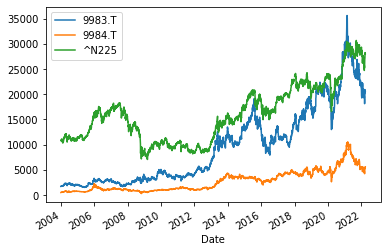

In [24]:
"""yfinanceを使用した複数の株価の取得と表示"""
import plotly.express as px
import yfinance as yf
import datetime

start = datetime.date(2004, 1, 1)
end = datetime.date(2022, 3, 31)

# 株価データを取得
# ソフトバンクグループ、ファーストリテイリング、日経平均株価
df = yf.download(['9984.T', '9983.T', '^N225'], start=start, end=end)['Adj Close']

# 調整後終値をプロット
df.plot()